<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Определение-испарения" data-toc-modified-id="Определение-испарения-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Определение испарения</a></span><ul class="toc-item"><li><span><a href="#Данные" data-toc-modified-id="Данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Данные</a></span><ul class="toc-item"><li><span><a href="#GLDAS" data-toc-modified-id="GLDAS-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>GLDAS</a></span></li><li><span><a href="#MOD16" data-toc-modified-id="MOD16-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>MOD16</a></span></li></ul></li><li><span><a href="#Методика" data-toc-modified-id="Методика-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Методика</a></span></li></ul></li><li><span><a href="#Расчёт" data-toc-modified-id="Расчёт-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Расчёт</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-обработка-данных" data-toc-modified-id="Загрузка-и-обработка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка и обработка данных</a></span></li><li><span><a href="#Среднемесячное-испарение" data-toc-modified-id="Среднемесячное-испарение-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Среднемесячное испарение</a></span></li><li><span><a href="#Среднегодовое-испарение" data-toc-modified-id="Среднегодовое-испарение-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Среднегодовое испарение</a></span></li><li><span><a href="#Расчёт-обеспеченных-среднемесячных-значений-тёплого-периода" data-toc-modified-id="Расчёт-обеспеченных-среднемесячных-значений-тёплого-периода-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Расчёт обеспеченных среднемесячных значений тёплого периода</a></span></li><li><span><a href="#Расчёт-обеспеченных-средних-значений-испарения-за-тёплый-период" data-toc-modified-id="Расчёт-обеспеченных-средних-значений-испарения-за-тёплый-период-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Расчёт обеспеченных средних значений испарения за тёплый период</a></span></li><li><span><a href="#Резултаты" data-toc-modified-id="Резултаты-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Резултаты</a></span></li></ul></li></ul></div>

## Определение испарения

*Выполнил:* гидрометеоролог Кирилл Жбаков

*Контакты:*

    - Telegram: @Zhbakov
    - Watsapp: +79035335522
    - Email: kirill.zhbakov@yandex.ru

**Цель** – определение значений испарения для города Дюртюли республики Башкартостан.

**Задачи:**

    - Загрузка данных об испарении;
    - Расчёт среднегодового испарения;
    - Расчёт среднемесячного испарения;
    - Расчёт испарения 1%, 3%, 50% обеспеченностей для месяцев тёплого периода (май-октябрь);    

In [1]:
# Импорт библиотек
import ee
import pandas as pd
import datetime
import scipy
import matplotlib.pyplot as plt
import numpy as np

### Данные

С целью расчёта значений испарения использовались два типа данных:
1. Данные Глобальной системы ассимиляции данных (GLDAS-2.2) Принстонского метеорологического центра. В настоящее время в GLDAS используются модели поверхности суши (LSM): Noah, CLSM, VIC.
2. Данные Глобального проекта эвапотранспирации MODIS (MOD16).

#### GLDAS
Моделирование суточной модели водосбора GLDAS-2.2 началось 1 февраля 2003 года с использованием условий из моделирования суточной модели водосбора GLDAS-2.0. Это моделирование было выполнено с использованием полей метеорологического анализа из интегрированной системы прогнозирования Европейского центра среднесрочных прогнозов погоды (ECMWF)
(https://www.ecmwf.int/en/publications/ifs-documentation). Было обобщено общее наблюдение аномалий содержания воды в ходе эксперимента по восстановлению силы тяжести и климата (GRACE). Данные GRACE RL06 и последующих наблюдений GRACE были
предоставлены Центром космических исследований Техасского университета. При моделировании ежедневной модели водосбора используется схема растительного покрова UMD из карты растительного покрова AVHRR. Информационные продукты GLDAS-2.2.

Основные характеристики GLDAS.

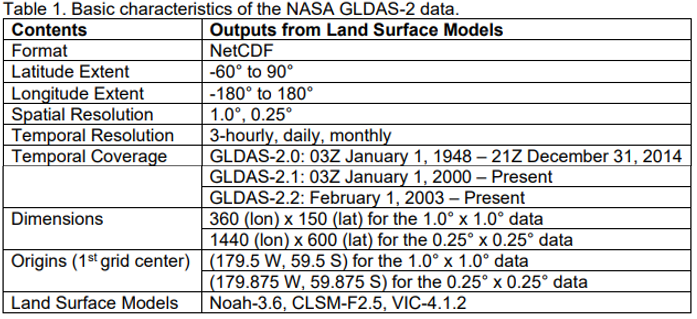

С целью расчета испарения использовалась характеристика модели "Evap_tavg" с еденицей измерения кг/м^2/с за период с 01.02.2003 по 31.12.2022 гг.

#### MOD16
Проект является частью проекта NASA / EOS по оценке глобальной земной эвапотранспирации с поверхности Земли с использованием данных дистанционного зондирования со спутников. Продукт MOD16 global evapotranspiration может использоваться для расчета регионального водного и энергетического баланса, состояния водных ресурсов почвы; следовательно, он предоставляет ключевую информацию для управления водными ресурсами. С помощью долгосрочных данных ET можно количественно оценить влияние изменений климата, землепользования и нарушений экосистем (например, лесных пожаров и вспышек насекомых) на региональные водные ресурсы и изменение энергии поверхности земли. Разрешение MOD16 составляет 500 м.

С целью расчета испарения использовался характеристика модели "ET" с единицей измерения кг/м^2/8-day за период с 01.01.2000 по 31.12.2022 гг.

### Методика

Данные об испарении загружались в точке с координатами 55.990389 с.ш. 54.325228 в.д. с помощью Google Earth Engine и языка программирования python. Расчёт выполнялся с помощью библиотеки pandas. Обеспеченные значения рассчитывались с помощью библиотеки scipy с использованием аналитической кривой распределения Пирсона третьего типа.

Ссылки на наборы данных:
1. [GLDAS](https://developers.google.com/earth-engine/datasets/catalog/NASA_GLDAS_V022_CLSM_G025_DA1D#description)
2. [MOD16](https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD16A2GF)

## Расчёт

### Загрузка и обработка данных

In [2]:
# Инициализация Google Earth Engine
ee.Initialize()

In [3]:
# Функция для загрузки данных в точке
def point_data_load(lng, lat, start_date, end_date, ee_dataset, param):

    # Создание области интереса (Region of Interest - ROI)
    point = ee.Geometry.Point([lng, lat]) #[lng, lat] 

    # Загрузка коллекции изображений
    collection = ee.ImageCollection(ee_dataset) \
        .filterDate(start_date, end_date)

    # Получение данных в точке интереса
    series = (collection.select(param) 
        .filterBounds(point)
        .getRegion(point, scale=1))  # scale - масштаб

    # Преобразование результата в список Python
    ee_list = series.getInfo()
    
    #Преобразование в dataframe
    # Создаем DataFrame из данных и заголовков mod
    header = ee_list[0]
    data = ee_list[1:]
    df = pd.DataFrame(data, columns=header)
    
    # Преобразование в формат datetime
    df['datetime'] = pd.to_datetime(df['time'], unit='ms')
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year
    
    return df

Подгружаем данные GLDAS.

In [4]:
df_gldas = point_data_load(54.325228, 55.990389, '2003-02-01', '2022-12-31', "NASA/GLDAS/V022/CLSM/G025/DA1D", 'Evap_tavg')

In [5]:
df_gldas.head()

,id,longitude,latitude,time,Evap_tavg,datetime,month,year
0,20030201,54.325226,55.990388,1044057600000,4.884948e-07,2003-02-01,2,2003
1,20030202,54.325226,55.990388,1044144000000,4.060992e-07,2003-02-02,2,2003
2,20030203,54.325226,55.990388,1044230400000,9.293059e-07,2003-02-03,2,2003
3,20030204,54.325226,55.990388,1044316800000,9.414226e-07,2003-02-04,2,2003
4,20030205,54.325226,55.990388,1044403200000,1.670417e-06,2003-02-05,2,2003


In [6]:
df_gldas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         7273 non-null   object        
 1   longitude  7273 non-null   float64       
 2   latitude   7273 non-null   float64       
 3   time       7273 non-null   int64         
 4   Evap_tavg  7273 non-null   float64       
 5   datetime   7273 non-null   datetime64[ns]
 6   month      7273 non-null   int32         
 7   year       7273 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(1)
memory usage: 397.9+ KB


Данные MOD16.

In [7]:
df_mod = point_data_load(54.325228, 55.990389, '2000-01-01', '2023-12-31', 'MODIS/061/MOD16A2GF', 'ET')

In [8]:
df_mod.head()

,id,longitude,latitude,time,ET,datetime,month,year
0,2000_01_01,54.325226,55.990388,946684800000,18,2000-01-01,1,2000
1,2000_01_09,54.325226,55.990388,947376000000,22,2000-01-09,1,2000
2,2000_01_17,54.325226,55.990388,948067200000,21,2000-01-17,1,2000
3,2000_01_25,54.325226,55.990388,948758400000,19,2000-01-25,1,2000
4,2000_02_02,54.325226,55.990388,949449600000,16,2000-02-02,2,2000


In [9]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1058 non-null   object        
 1   longitude  1058 non-null   float64       
 2   latitude   1058 non-null   float64       
 3   time       1058 non-null   int64         
 4   ET         1058 non-null   int64         
 5   datetime   1058 non-null   datetime64[ns]
 6   month      1058 non-null   int32         
 7   year       1058 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(1)
memory usage: 58.0+ KB


In [10]:
# Обработка данных mod16
# Рассчитываем количество дней между записями
df_mod['difference'] = abs(df_mod['datetime'].diff(periods=-1)).dt.days

# Обрабатываем df_mod16 - приводим к 8-ми дневной период к однодневному
df_mod = df_mod.set_index('datetime').resample('1D').ffill()
df_mod = df_mod[df_mod.index < '2022-01-01']
df_mod['ET'] = df_mod['ET']/df_mod['difference']
df_mod['month']= df_mod.index.month

### Среднемесячное испарение

In [11]:
# Группировка по году и месяцу gldas
df_grouped_gldas = df_gldas.groupby(['month', 'year']).agg(
    Evap=('Evap_tavg', 'mean'),  # Вычисление суммы 'Evap_tavg'
    Count=('Evap_tavg', 'count')  # Подсчет количества значений
).reset_index()

# Группировка по году и месяцу mod16
df_grouped_mod = df_mod.groupby(['month', 'year']).agg(
    Evap=('ET', 'mean'),  # Вычисление суммы 'Evap_tavg'
    Count=('ET', 'count')  # Подсчет количества значений
).reset_index()

In [12]:
# Превод значений gldas из kg/m^2/s в mm
df_grouped_gldas['Evap_mm'] = df_grouped_gldas['Evap'] * df_grouped_gldas['Count'] *86400

# Превод значений mod16 из kg/m^2 в mm
df_grouped_mod['Evap_mm'] = df_grouped_mod['Evap'] * df_grouped_mod['Count'] * 0.1

Ниже представлнена таблица среднемесячных значений испарения.

In [13]:
# Расчёт среднемесячного значения по gldas
df_month_mean_gldas = df_grouped_gldas.groupby('month')['Evap_mm'].mean()
# Расчёт среднемесячного значения по mod16
df_month_mean_mod = df_grouped_mod.groupby('month')['Evap_mm'].mean()

df = pd.concat([df_month_mean_gldas, df_month_mean_mod], axis=1)
df.columns = ['GLDAS, мм', 'MOD16, мм']
df.style.format('{:.2f}')

,"GLDAS, мм","MOD16, мм"
month,,
1,0.29,7.74
2,1.89,7.54
3,10.04,12.10
4,36.00,35.98
5,86.73,51.27
6,107.10,83.43
7,108.93,95.25
8,77.68,58.43
9,34.28,33.53


### Среднегодовое испарение

In [14]:
# Вставим среденее значение в данные GLDAS за январь в 2003 год для последующих корректных расчётов
df_grouped_gldas.loc[len(df_grouped_gldas.index)] = [1, 2003, 0, 31, df_month_mean_gldas.iloc[0]]

In [15]:
# Расчёт среднегодового значения
year_mean_gldas = df_grouped_gldas.groupby('year')['Evap_mm'].sum().mean()
year_mean_mod = df_grouped_mod.groupby('year')['Evap_mm'].sum().mean()

df = pd.DataFrame(
                  {
                    'GLDAS, мм' : year_mean_gldas,
                   'MOD16, мм' : year_mean_mod 
                  },
                  index=[0]
                  )
df.style.format('{:.0f}')

,"GLDAS, мм","MOD16, мм"
0,479,422


### Расчёт обеспеченных среднемесячных значений тёплого периода

In [16]:
# Подсчёт обеспеченных значений
def evaporation(df_grouped):
    ppf_values_1 = []
    ppf_values_3 = []
    ppf_values_50 = []
    months = [5, 6, 7, 8, 9, 10]

    for month in months:
        df = df_grouped[df_grouped['month'] == month]
        dist = scipy.stats.pearson3
        bounds=[(0,200),(0,200), (0,200)]
        res = scipy.stats.fit(dist, df['Evap_mm'].array, bounds=bounds)
        a, b, c = res.params
        fitted_dist = scipy.stats.pearson3(a, b, c)
        ppf_values_1.append(fitted_dist.ppf(0.99))
        ppf_values_3.append(fitted_dist.ppf(0.97))
        ppf_values_50.append(fitted_dist.ppf(0.50))

        res.plot(plot_type='cdf')
        plt.title('Функция распределения Pearson III')
        plt.ylabel('Вероятность')
        plt.xlabel('Испарение, мм (Месяц №{})'.format(month));
        plt.show()
        
    Evap = pd.DataFrame({"Month" : months,
                    "Values_1p" : ppf_values_1,
                     "Values_3p" : ppf_values_3,
                     "Values_50p" : ppf_values_50})
    
    return Evap.style.format("{:.2f}")

Расчёт обеспеченных значений по данным GLDAS.

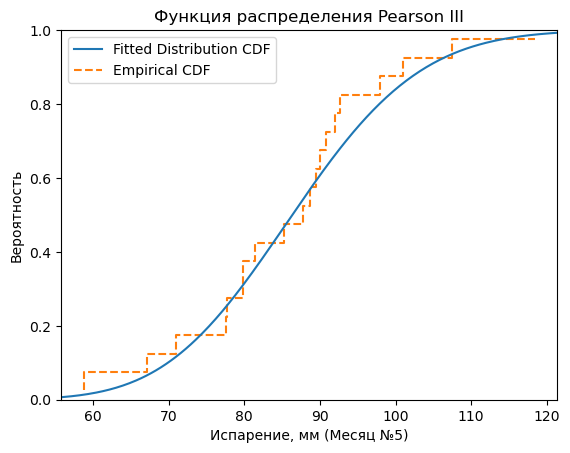

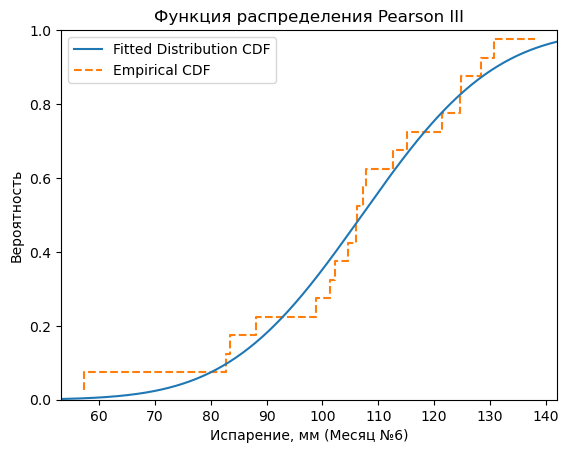

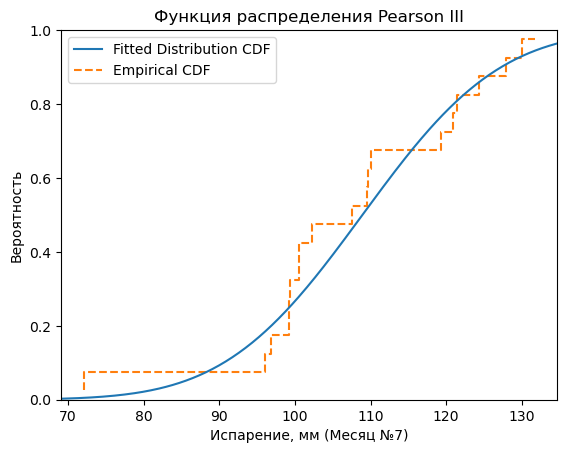

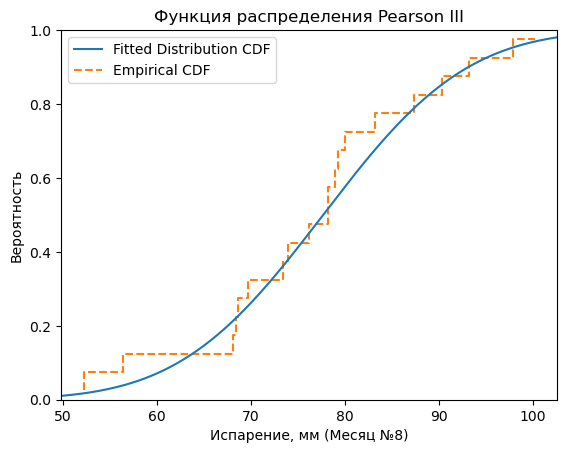

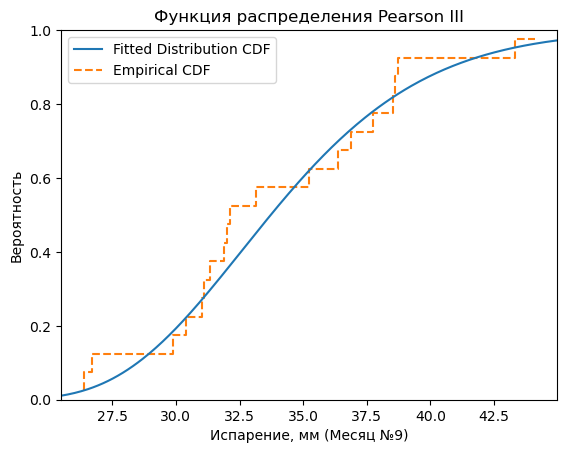

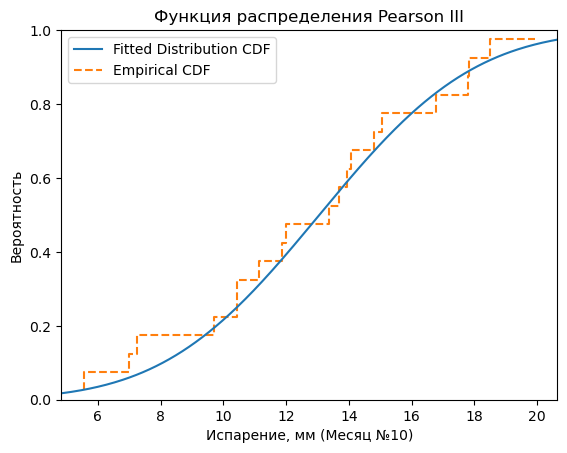

,Month,Values_1p,Values_3p,Values_50p
0,5.00,119.56,112.86,86.33
1,6.00,150.71,142.36,107.10
2,7.00,142.24,135.86,108.93
3,8.00,105.75,100.38,77.68
4,9.00,47.98,44.74,33.73
5,10.00,22.12,20.38,13.06


In [17]:
evaporation(df_grouped_gldas)

Расчёт обеспеченных значений по данным MOD16.

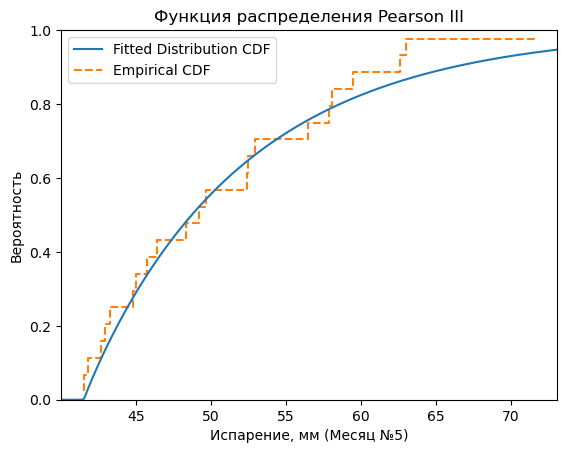

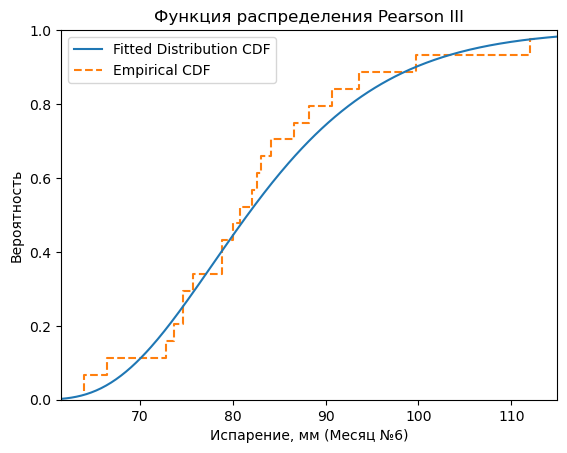

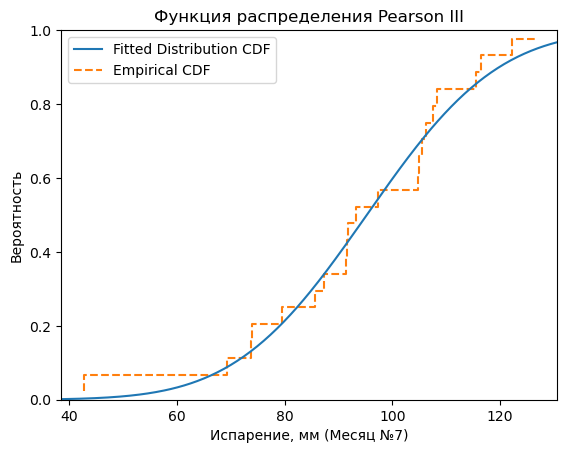

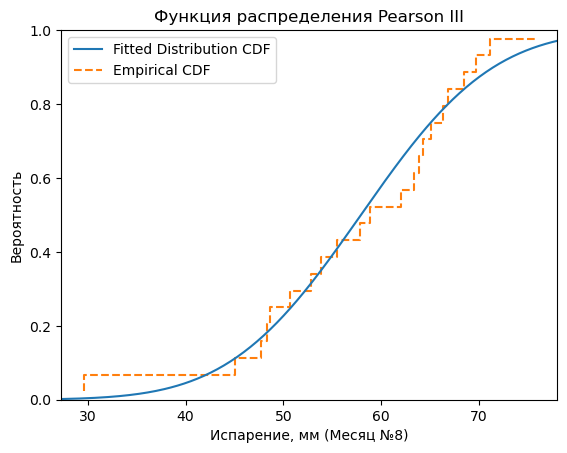

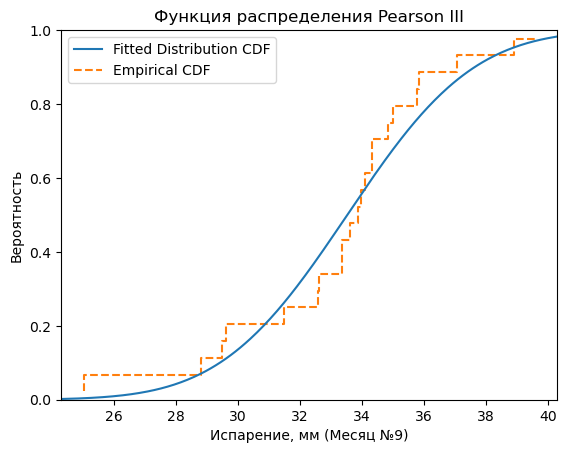

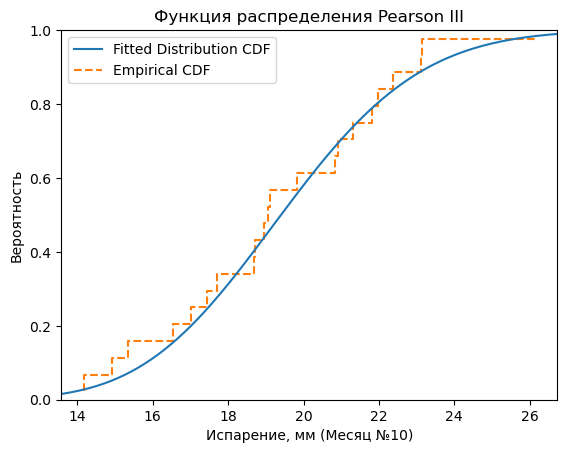

,Month,Values_1p,Values_3p,Values_50p
0,5.00,91.36,79.31,48.71
1,6.00,119.48,110.45,81.59
2,7.00,139.85,131.31,95.25
3,8.00,82.57,77.85,57.93
4,9.00,40.98,39.56,33.53
5,10.00,26.77,25.27,19.40


In [18]:
evaporation(df_grouped_mod)

### Расчёт обеспеченных средних значений испарения за тёплый период

In [19]:
def evaporation_warm(df_grouped, months):
    # Тёплый период
    df_grouped_warm = df_grouped[df_grouped['month'].isin(months)]
    df_grouped_warm = df_grouped_warm.groupby('year')['Evap_mm'].sum().reset_index()

    ppf_pct = [0.99, 0.97, 0.50]
    ppf_values = []
    for pct in ppf_pct:
        dist = scipy.stats.pearson3
        bounds=[(0,600),(0,600), (0,600)]
        res = scipy.stats.fit(dist, df_grouped_warm['Evap_mm'].array, bounds=bounds)
        a, b, c = res.params
        fitted_dist = scipy.stats.pearson3(a, b, c)
        ppf_values.append(fitted_dist.ppf(pct))

    res.plot(plot_type='cdf')
    plt.title('Функция распределения Pearson III')
    plt.ylabel('Вероятность')
    plt.xlabel('Испарение, мм')
    plt.show();
    
    Evap = pd.DataFrame({"Pct" : ppf_pct,
                     "Evap_mm" : ppf_values})  
    
    return Evap.style.format('{:.2f}')

Расчёт обеспеченных средних значений испарения за тёплый период по данным GLDAS.

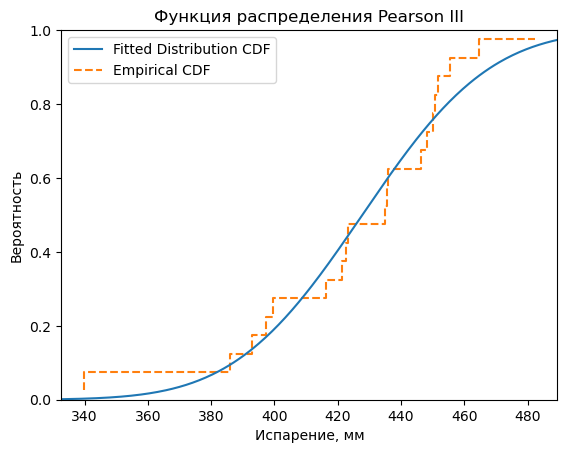

,Pct,Evap_mm
0,0.99,501.83
1,0.97,487.65
2,0.50,427.77


In [20]:
evaporation_warm(df_grouped_gldas, [5, 6, 7, 8, 9, 10])

Расчёт обеспеченных средних значений испарения за тёплый период по данным MOD16.

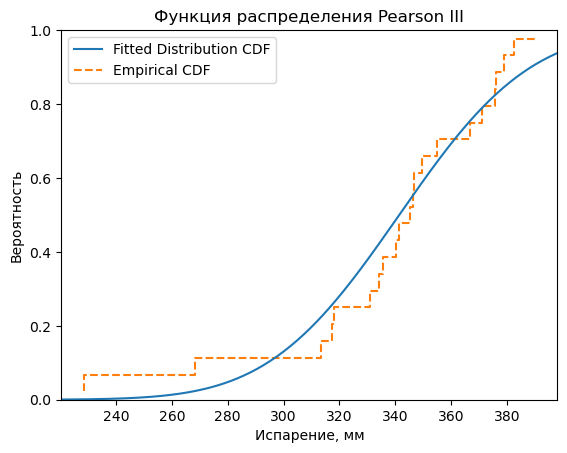

,Pct,Evap_mm
0,0.99,427.13
1,0.97,410.71
2,0.50,341.43


In [21]:
evaporation_warm(df_grouped_mod, [5, 6, 7, 8, 9, 10])

### Резултаты

- Рассчитаны среднегодовые и среднемесячные значения испарения.
- Рассчитаны обеспеченные среднемесячные значения и за тёплый период. 